In [11]:
# khai báo thư viện cần thiết
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [12]:
# đọc dữ liệu
df = pd.read_csv("FoodPrice_in_Turkey.csv", encoding = "ISO-8859-1")
# in ra kich thuoc du lieu
df.shape

(7381, 8)

In [13]:
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [14]:
# mô tả dữ liệu
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


In [15]:
# thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [16]:
# kiểm tra dữ liệu bị khuyết
df.isna()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
7376,False,False,False,False,False,False,False,False
7377,False,False,False,False,False,False,False,False
7378,False,False,False,False,False,False,False,False
7379,False,False,False,False,False,False,False,False


In [17]:
# kiểm tra dữ liệu không bị khuyết
df.notna()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
7376,True,True,True,True,True,True,True,True
7377,True,True,True,True,True,True,True,True
7378,True,True,True,True,True,True,True,True
7379,True,True,True,True,True,True,True,True


In [18]:
# xóa những dòng chứa giá trị bị khuyết
df1 = df.dropna()

In [19]:
df1.shape
# Có thể thấy, bộ dữ liệu này không bị khuyết

(7381, 8)

<AxesSubplot:xlabel='Price'>

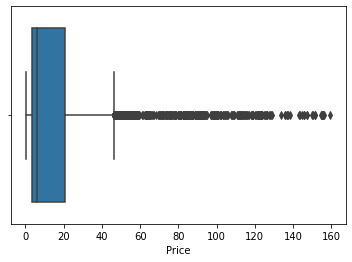

In [20]:
# Xử lý dữ liệu ngoại lai cho đặc trưng Price
sns.boxplot(x=df1['Price'])  # vẽ box plot cho dữ liệu ở cột Price

In [21]:
# Xóa dữ liệu ngoại lai bằng IQR score
Q1 = df1['Price'].quantile(0.25)
Q3 = df1['Price'].quantile(0.75)
IQR = Q3 - Q1

In [22]:
# xác định phần tử không phải ngoại lai
df2 = df1
df2['outlier'] = ~((df1['Price'] < (Q1 - 1.5*IQR)) | (df1['Price'] > (Q3 + 1.5*IQR)))

In [23]:
# xóa phần tử ngoại lai
df2 = df2[df2['outlier'] == True]

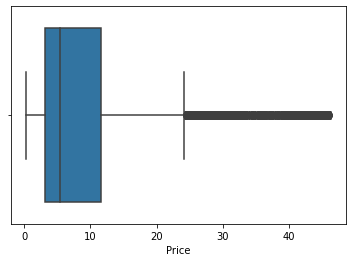

In [24]:
sns.boxplot(x=df2['Price']);  # vẽ box plot cho dữ liệu ở cột Price

In [25]:
# Chuẩn hóa dữ liệu
# mô tả dữ liệu
df2['Price'].describe()

count    6784.000000
mean       10.503617
std        11.661447
min         0.253900
25%         3.079550
50%         5.373350
75%        11.541925
max        46.251900
Name: Price, dtype: float64

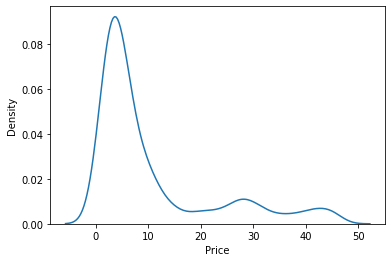

In [26]:
# biểu đồ phân bố dữ liệu
sns.kdeplot(data=df2['Price']);

In [27]:
# chuẩn hóa dữ liệu với minmax scaling
scaler = MinMaxScaler()
# Chuẩn hóa dữ liệu trong df với Min max scaling ở 2 cột Price
df_s = scaler.fit_transform(df2[['Price']])

In [28]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,6784.000000
mean,0.222830
std,0.253521
min,0.000000
25%,0.061430
50%,0.111297
75%,0.245403
max,1.000000


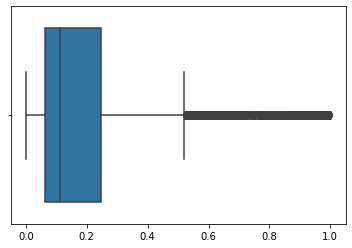

In [29]:
# vẽ lại biểu đồ hộp
sns.boxplot(x=df_s);

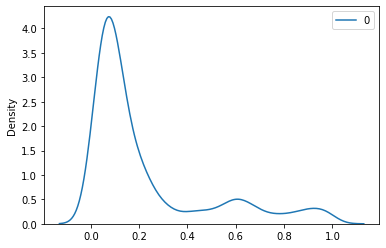

In [30]:
# biểu đồ phân bố dữ liệu
sns.kdeplot(data=df_s);

In [31]:
# chuẩn hóa dữ liệu với robust scaling
scaler = RobustScaler()
# Chuẩn hóa dữ liệu trong df với Robust Scaling ở 2 cột Price
df_s = scaler.fit_transform(df2[['Price']])

In [32]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,6.784000e+03
mean,6.062443e-01
std,1.378035e+00
min,-6.049661e-01
25%,-2.710587e-01
50%,-5.247539e-17
75%,7.289413e-01
max,4.830624e+00


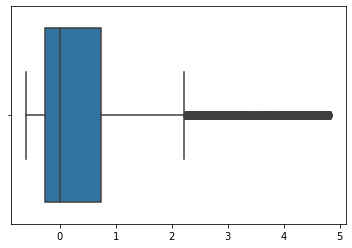

In [33]:
# vẽ lại biểu đồ hộp
sns.boxplot(x=df_s);

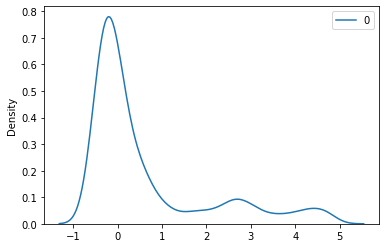

In [34]:
# biểu đồ phân bố dữ liệu
sns.kdeplot(data=df_s);

In [35]:
# chuẩn hóa dữ liệu với z-score scaling
scaler = StandardScaler()
# Chuẩn hóa dữ liệu trong df với StandardScaler ở 2 cột Price
df_s = scaler.fit_transform(df2[['Price']])

In [36]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,6.784000e+03
mean,-1.984786e-16
std,1.000074e+00
min,-8.790052e-01
25%,-6.366803e-01
50%,-4.399664e-01
75%,8.904423e-02
max,3.065736e+00


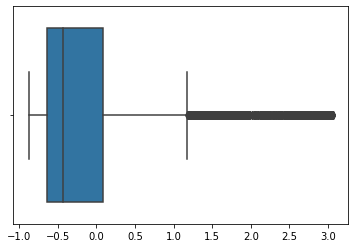

In [37]:
sns.boxplot(x=df_s);

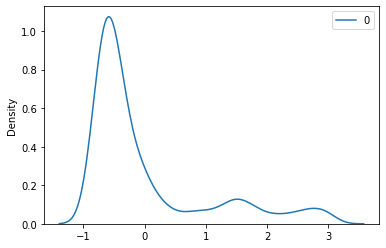

In [38]:
sns.kdeplot(data=df_s);

In [39]:
# Mã hóa dữ liệu
# các giá trị ở cột ProductName
df2['ProductName'].unique()

array(['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail',
       'Pasta - Retail', 'Tomatoes - Retail',
       'Groundnuts (shelled) - Retail', 'Bread (common) - Retail',
       'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail',
       'Cabbage - Retail', 'Meat (mutton) - Retail',
       'Oil (sunflower) - Retail', 'Salt - Retail',
       'Coffee (instant) - Retail', 'Peas (green, dry) - Retail',
       'Apples (red) - Retail', 'Cauliflower - Retail',
       'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail',
       'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Transport (public) - Retail', 'Tomatoes (paste) - Retail',
       'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail',
       'Yogurt - Retail', 'Bread (pita) - Retail', 'C

In [40]:
# mã hóa cột ProductName với One-hot encoder sử dụng scikit learn
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(np.asarray(df2['ProductName']).reshape(-1,1))
encoded_data.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
# mã hóa cột ProductName với One-hot encoder sử dụng pandas
pd.get_dummies(df2['ProductName'])

,Apples (red) - Retail,Apples - Retail,Bananas - Retail,Beans (white) - Retail,Bread (common) - Retail,Bread (pita) - Retail,Bulgur - Retail,Cabbage - Retail,Cauliflower - Retail,Cheese - Retail,...,Tea (herbal) - Retail,Tea - Retail,Tomatoes (paste) - Retail,Tomatoes - Retail,Transport (public) - Retail,"Wage (non-qualified labour, non-agricultural) - Retail",Water - Retail,Wheat flour - Retail,Yogurt - Retail,Zucchini - Retail
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# mã hóa cột ProductName với Label encoder sử dụng scikit learn
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(np.asarray(df2['ProductName']))
encoded_data

array([36, 36, 36, ..., 11, 11, 11])

In [43]:
# mã hóa cột ProductName với Label encoder sử dụng pandas
df2['ProductName'].astype('category').cat.codes

0       36
1       36
2       36
3       36
4       36
        ..
7369    11
7370    11
7371    11
7372    11
7373    11
Length: 6784, dtype: int8

In [44]:
# Rời rạc hóa dữ liệu
df2.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price,outlier
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920,True
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786,True
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865,True
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337,True
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099,True


In [45]:
# Rời rạc hóa dữ liệu ở cột Price
# chia thành 5 khoảng giá trị có độ dài bằng nhau
cats = pd.cut(df2['Price'], 5)
cats

0         (0.208, 9.454]
1         (0.208, 9.454]
2         (0.208, 9.454]
3         (0.208, 9.454]
4         (0.208, 9.454]
              ...       
7369    (37.052, 46.252]
7370    (37.052, 46.252]
7371    (37.052, 46.252]
7372    (37.052, 46.252]
7373    (37.052, 46.252]
Name: Price, Length: 6784, dtype: category
Categories (5, interval[float64]): [(0.208, 9.454] < (9.454, 18.653] < (18.653, 27.853] < (27.853, 37.052] < (37.052, 46.252]]

In [46]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(0.208, 9.454]      4711
(9.454, 18.653]      743
(18.653, 27.853]     474
(27.853, 37.052]     449
(37.052, 46.252]     407
Name: Price, dtype: int64

In [47]:
# chia thành 5 phần có số lượng phần tử tương đương nhau
cats = pd.qcut(df2['Price'], 5)
cats

0          (4.315, 6.81]
1          (4.315, 6.81]
2          (4.315, 6.81]
3          (4.315, 6.81]
4          (4.315, 6.81]
              ...       
7369    (17.637, 46.252]
7370    (17.637, 46.252]
7371    (17.637, 46.252]
7372    (17.637, 46.252]
7373    (17.637, 46.252]
Name: Price, Length: 6784, dtype: category
Categories (5, interval[float64]): [(0.253, 2.694] < (2.694, 4.315] < (4.315, 6.81] < (6.81, 17.637] < (17.637, 46.252]]

In [48]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(0.253, 2.694]      1358
(4.315, 6.81]       1357
(17.637, 46.252]    1357
(2.694, 4.315]      1356
(6.81, 17.637]      1356
Name: Price, dtype: int64